In [1]:
%matplotlib inline
import sys
import os
import numpy as np
import h5py as h5
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy.optimize import curve_fit

In [2]:
beta=3.6  # set the parameters here
nx=32
nt=64
ms=-0.013
mc=0.25

Now load in the data from the hdf5 file

In [3]:
with h5.File('correlators.h5', 'r') as h5f:
    qG1q_sh = h5f[f"beta{beta}/ms{ms}/mc{mc}/nx{nx}/nt{nt}/SHELL_SHELL/q_g15_qbar"][()]  # data for pion
    qG1q_pt = h5f[f"beta{beta}/ms{ms}/mc{mc}/nx{nx}/nt{nt}/POINT_SHELL/q_g15_qbar"][()]
    QG2q_sh = h5f[f"beta{beta}/ms{ms}/mc{mc}/nx{nx}/nt{nt}/SHELL_SHELL/Q_g15_qbar"][()]  # data for D-mesion
    QG2q_pt = h5f[f"beta{beta}/ms{ms}/mc{mc}/nx{nx}/nt{nt}/POINT_SHELL/Q_g15_qbar"][()]
    r6_sh = h5f[f"beta{beta}/ms{ms}/mc{mc}/nx{nx}/nt{nt}/SHELL_SHELL/r6_g15g15"][()]     # 6 rep.
    r6_pt = h5f[f"beta{beta}/ms{ms}/mc{mc}/nx{nx}/nt{nt}/POINT_SHELL/r6_g15g15"][()]
    r15_sh = h5f[f"beta{beta}/ms{ms}/mc{mc}/nx{nx}/nt{nt}/SHELL_SHELL/r15_g15g15"][()]   # 15 rep.
    r15_pt = h5f[f"beta{beta}/ms{ms}/mc{mc}/nx{nx}/nt{nt}/POINT_SHELL/r15_g15g15"][()]

# Plotting the correlators

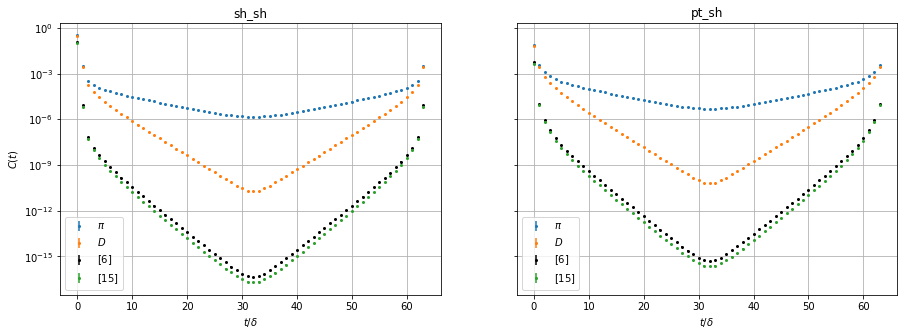

In [4]:
qG1q_sh_avg = np.mean(qG1q_sh, axis=0)  # these are the mean values of the correlators
QG2q_sh_avg = np.mean(QG2q_sh, axis=0)
r6_sh_avg = np.mean(r6_sh, axis=0)
r15_sh_avg = np.mean(r15_sh, axis=0)

qG1q_pt_avg = np.mean(qG1q_pt, axis=0)
QG2q_pt_avg = np.mean(QG2q_pt, axis=0)
r6_pt_avg = np.mean(r6_pt, axis=0)
r15_pt_avg = np.mean(r15_pt, axis=0)

CFGS = len(qG1q_sh) # number of configurations
NBS = 4*CFGS  # number of bootstrap samples
samples = np.random.randint(0, CFGS, [NBS, CFGS])

# this calculates the bootstrap error per timeslice for each correlator
Rerr_qG1q_sh = np.std(np.real(np.array([np.mean(np.array([qG1q_sh[cfg] for cfg in samples[sample]]), axis=0) for sample in range(NBS) ] )), axis=0)
Ierr_qG1q_sh = np.std(np.imag(np.array([np.mean(np.array([qG1q_sh[cfg] for cfg in samples[sample]]), axis=0) for sample in range(NBS) ] )), axis=0)

Rerr_QG2q_sh = np.std(np.real(np.array([np.mean(np.array([QG2q_sh[cfg] for cfg in samples[sample]]), axis=0) for sample in range(NBS) ] )), axis=0)
Ierr_QG2q_sh = np.std(np.imag(np.array([np.mean(np.array([QG2q_sh[cfg] for cfg in samples[sample]]), axis=0) for sample in range(NBS) ] )), axis=0)

Rerr_r15_sh = np.std(np.real(np.array([np.mean(np.array([r15_sh[cfg] for cfg in samples[sample]]), axis=0) for sample in range(NBS) ] )), axis=0)
Ierr_r15_sh = np.std(np.imag(np.array([np.mean(np.array([r15_sh[cfg] for cfg in samples[sample]]), axis=0) for sample in range(NBS) ] )), axis=0)

Rerr_r6_sh = np.std(np.real(np.array([np.mean(np.array([r6_sh[cfg] for cfg in samples[sample]]), axis=0) for sample in range(NBS) ] )), axis=0)
Ierr_r6_sh = np.std(np.imag(np.array([np.mean(np.array([r6_sh[cfg] for cfg in samples[sample]]), axis=0) for sample in range(NBS) ] )), axis=0)

Rerr_qG1q_pt = np.std(np.real(np.array([np.mean(np.array([qG1q_pt[cfg] for cfg in samples[sample]]), axis=0) for sample in range(NBS) ] )), axis=0)
Ierr_qG1q_pt = np.std(np.imag(np.array([np.mean(np.array([qG1q_pt[cfg] for cfg in samples[sample]]), axis=0) for sample in range(NBS) ] )), axis=0)

Rerr_QG2q_pt = np.std(np.real(np.array([np.mean(np.array([QG2q_pt[cfg] for cfg in samples[sample]]), axis=0) for sample in range(NBS) ] )), axis=0)
Ierr_QG2q_pt = np.std(np.imag(np.array([np.mean(np.array([QG2q_pt[cfg] for cfg in samples[sample]]), axis=0) for sample in range(NBS) ] )), axis=0)

Rerr_r15_pt = np.std(np.real(np.array([np.mean(np.array([r15_pt[cfg] for cfg in samples[sample]]), axis=0) for sample in range(NBS) ] )), axis=0)
Ierr_r15_pt = np.std(np.imag(np.array([np.mean(np.array([r15_pt[cfg] for cfg in samples[sample]]), axis=0) for sample in range(NBS) ] )), axis=0)

Rerr_r6_pt = np.std(np.real(np.array([np.mean(np.array([r6_pt[cfg] for cfg in samples[sample]]), axis=0) for sample in range(NBS) ] )), axis=0)
Ierr_r6_pt = np.std(np.imag(np.array([np.mean(np.array([r6_pt[cfg] for cfg in samples[sample]]), axis=0) for sample in range(NBS) ] )), axis=0)

fig, axs = plt.subplots(nrows=1, ncols=2, sharey=True,figsize=(15,5))
ax = axs[0]
ax.errorbar([t for t in range(nt)], np.real(qG1q_sh_avg),yerr=Rerr_qG1q_sh , fmt='o', markersize='2',label=r'$\pi$')
ax.errorbar([t for t in range(nt)], np.real(QG2q_sh_avg),yerr=Rerr_QG2q_sh , fmt='o', markersize='2',label=r'$D$')
ax.errorbar([t for t in range(nt)], np.real(r6_sh_avg),yerr=Rerr_r6_sh , fmt='ko', markersize='2',label=r'$[6]$')
ax.errorbar([t for t in range(nt)], np.real(r15_sh_avg),yerr=Rerr_r15_sh , fmt='o', markersize='2',label=r'$[15]$')
ax.set_yscale('log')
ax.grid('True')
ax.set_xlabel(r'$t/\delta$')
ax.set_ylabel(r'$C(t)$')
ax.set_title('sh_sh')
ax.legend(loc="best")

ax = axs[1]
ax.errorbar([t for t in range(nt)], np.real(qG1q_pt_avg),yerr=Rerr_qG1q_pt , fmt='o', markersize='2',label=r'$\pi$')
ax.errorbar([t for t in range(nt)], np.real(QG2q_pt_avg),yerr=Rerr_QG2q_pt , fmt='o', markersize='2',label=r'$D$')
ax.errorbar([t for t in range(nt)], np.real(r6_pt_avg),yerr=Rerr_r6_pt , fmt='ko', markersize='2',label=r'$[6]$')
ax.errorbar([t for t in range(nt)], np.real(r15_pt_avg),yerr=Rerr_r15_pt , fmt='o', markersize='2',label=r'$[15]$')
ax.set_yscale('log')
ax.grid('True')
ax.set_xlabel(r'$t/\delta$')
ax.set_title('pt_sh')
ax.legend(loc='best');

# Fitting the correlators

So for these fits I will try to fit the correlators directly with cosh functions.

## Fitting just the single meson correlators

In [7]:
def mesonCosh1state(t,Acoeff, mass):
    return Acoeff*np.cosh(mass*(t-nt/2))

def mesonCosh2state(t,Acoeff, Bcoeff, mass1, mass2):
    return Acoeff*np.cosh(mass1*(t-nt/2)) + Bcoeff*np.cosh(mass2*(t-nt/2))

### $\pi$-correlator

In [11]:
tmin = 10
tdat = [t for t in range(tmin,nt-tmin)]
piCorr = [np.real(qG1q_sh_avg[t]) for t in tdat]

In [12]:
popt, pcov = curve_fit(mesonCosh1state, tdat, piCorr)

In [13]:
popt

array([1.40633157e-06, 1.70046659e-01])

In [31]:
pcov

array([[ 1.47173344e-16, -5.36514023e-12],
       [-5.36514023e-12,  2.01241053e-07]])

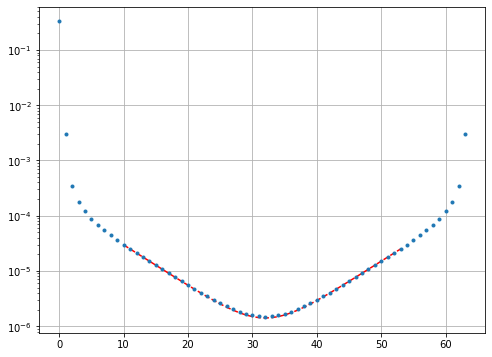

In [40]:
plt.figure(figsize=(8, 6))
plt.errorbar([t for t in range(nt)], np.real(qG1q_sh_avg),yerr=Rerr_qG1q_sh , fmt='.')
plt.plot(tdat, mesonCosh1state(np.array(tdat), *popt), 'r--')
plt.yscale('log')
plt.grid();

Let me now put everything under the bootstrap

In [213]:
tmin = 10
tdat = [t for t in range(tmin,nt-tmin)]

NBS = 200
CFGS = len(qG1q_sh) # number of configurations
samples = np.random.randint(0, CFGS, [NBS, CFGS])

m0pi = []
Api = []
for bs in range(len(samples)):
    corr = np.array([np.real(qG1q_sh[cfg]) for cfg in samples[bs]])
    popt, pcov = curve_fit(mesonCosh1state, tdat, 
                           np.mean(corr,axis=0)[tmin:nt-tmin],sigma=np.std(corr,axis=0)[tmin:nt-tmin])
    Api.append(popt[0])
    m0pi.append(popt[1])
print(r'm_pi = {} +/- {}'.format(np.mean(m0pi),np.std(m0pi)))
print(r'A_pi = {} +/- {}'.format(np.mean(Api),np.std(Api)))

m_pi = 0.16720770539424776 +/- 0.0002535982089044744
A_pi = 1.4735026554258443e-06 +/- 1.034377082154709e-08


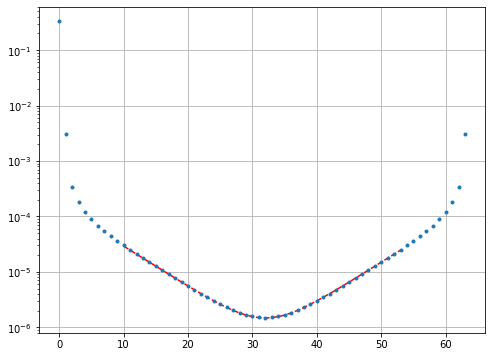

In [214]:
plt.figure(figsize=(8, 6))
plt.errorbar([t for t in range(nt)], np.real(qG1q_sh_avg),yerr=Rerr_qG1q_sh , fmt='.')
plt.plot(tdat, mesonCosh1state(np.array(tdat),np.mean(Api),np.mean(m0pi) ), 'r--')
plt.yscale('log')
plt.grid();

In [215]:
tmin = 4
tdat = [t for t in range(tmin,nt-tmin)]

NBS = 200
CFGS = len(qG1q_sh) # number of configurations
samples = np.random.randint(0, CFGS, [NBS, CFGS])

m0pi = []
Api = []
m1pi = []
Bpi = []
for bs in range(len(samples)):
    corr = np.array([np.real(qG1q_sh[cfg]) for cfg in samples[bs]])
    popt, pcov = curve_fit(mesonCosh2state, tdat, 
                           np.mean(corr,axis=0)[tmin:nt-tmin],sigma=np.std(corr,axis=0)[tmin:nt-tmin],
                           p0=[1.4e-6,1.e-11,.17,.50])
    Api.append(popt[0])
    Bpi.append(popt[1])
    m0pi.append(popt[2])
    m1pi.append(popt[3])
print(r'm_pi = {} +/- {}'.format(np.mean(m0pi),np.std(m0pi)))
print(r'A_pi = {} +/- {}'.format(np.mean(Api),np.std(Api)))
print(r'e_pi = {} +/- {}'.format(np.mean(m1pi),np.std(m1pi)))
print(r'B_pi = {} +/- {}'.format(np.mean(Bpi),np.std(Bpi)))

m_pi = 0.1662798053882868 +/- 0.0002763914554640078
A_pi = 1.4825915801931806e-06 +/- 1.0851211727582783e-08
e_pi = 0.6114571016832671 +/- 0.0032515070233989185
B_pi = 3.112025292353275e-12 +/- 2.9682729732342844e-13


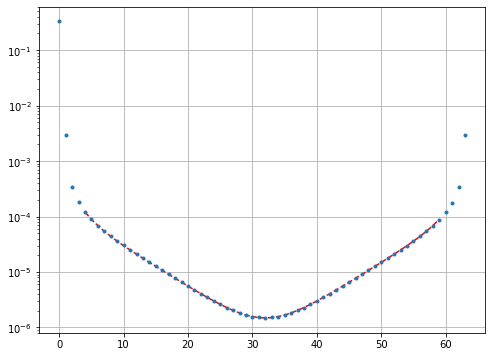

In [216]:
plt.figure(figsize=(8, 6))
plt.errorbar([t for t in range(nt)], np.real(qG1q_sh_avg),yerr=Rerr_qG1q_sh , fmt='.')
plt.plot(tdat, mesonCosh2state(np.array(tdat),np.mean(Api),np.mean(Bpi),np.mean(m0pi),np.mean(m1pi) ), 'r--')
plt.yscale('log')
plt.grid();

### D-meson fits

In [229]:
tmin = 15
tdat = [t for t in range(tmin,nt-tmin)]

NBS = 200
CFGS = len(QG2q_sh) # number of configurations
samples = np.random.randint(0, CFGS, [NBS, CFGS])

m0D = []
AD = []
for bs in range(len(samples)):
    corr = np.array([np.real(QG2q_sh[cfg]) for cfg in samples[bs]])
    popt, pcov = curve_fit(mesonCosh1state, tdat, 
                           np.mean(corr,axis=0)[tmin:nt-tmin],sigma=np.std(corr,axis=0)[tmin:nt-tmin])
    AD.append(popt[0])
    m0D.append(popt[1])
print(r'm_D = {} +/- {}'.format(np.mean(m0D),np.std(m0D)))
print(r'A_D = {} +/- {}'.format(np.mean(AD),np.std(AD)))

m_D = 0.5119061491884139 +/- 0.0002472582715639224
A_D = 1.830256304734183e-11 +/- 9.328594390454871e-14


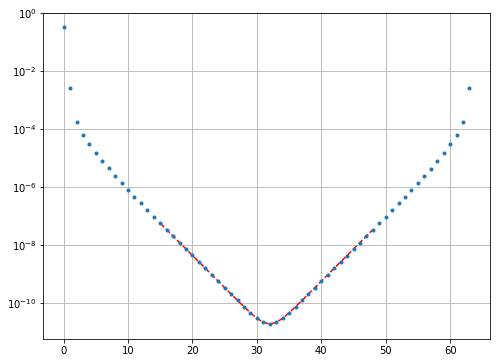

In [230]:
plt.figure(figsize=(8, 6))
plt.errorbar([t for t in range(nt)], np.real(QG2q_sh_avg),yerr=Rerr_QG2q_sh , fmt='.')
plt.plot(tdat, mesonCosh1state(np.array(tdat),np.mean(AD),np.mean(m0D) ), 'r--')
plt.yscale('log')
plt.grid();

In [233]:
tmin = 5
tdat = [t for t in range(tmin,nt-tmin)]

NBS = 200
CFGS = len(QG2q_sh) # number of configurations
samples = np.random.randint(0, CFGS, [NBS, CFGS])

m0pi = []
Api = []
m1pi = []
Bpi = []
for bs in range(len(samples)):
    corr = np.array([np.real(QG2q_sh[cfg]) for cfg in samples[bs]])
    popt, pcov = curve_fit(mesonCosh2state, tdat, 
                           np.mean(corr,axis=0)[tmin:nt-tmin],sigma=np.std(corr,axis=0)[tmin:nt-tmin],
                           p0=[1.4e-11,1.e-16,.53,.9])
    Api.append(popt[0])
    Bpi.append(popt[1])
    m0pi.append(popt[2])
    m1pi.append(popt[3])
print(r'm_pi = {} +/- {}'.format(np.mean(m0pi),np.std(m0pi)))
print(r'A_pi = {} +/- {}'.format(np.mean(Api),np.std(Api)))
print(r'e_pi = {} +/- {}'.format(np.mean(m1pi),np.std(m1pi)))
print(r'B_pi = {} +/- {}'.format(np.mean(Bpi),np.std(Bpi)))

m_pi = 0.5111275148524341 +/- 0.00028348284087254704
A_pi = 1.8348408245753184e-11 +/- 9.958817781212067e-14
e_pi = 0.8384282361268831 +/- 0.0021465938067783794
B_pi = 1.6421751651591837e-15 +/- 1.0171861340292638e-16


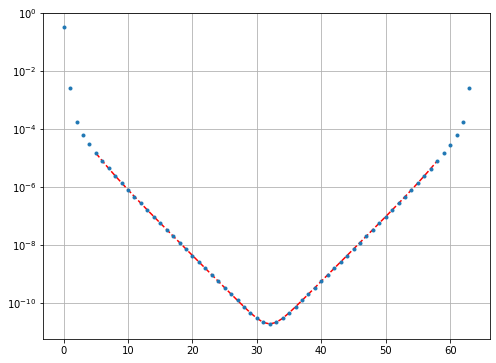

In [234]:
plt.figure(figsize=(8, 6))
plt.errorbar([t for t in range(nt)], np.real(QG2q_sh_avg),yerr=Rerr_QG2q_sh , fmt='.')
plt.plot(tdat, mesonCosh2state(np.array(tdat),np.mean(Api),np.mean(Bpi),np.mean(m0pi),np.mean(m1pi) ), 'r--')
plt.yscale('log')
plt.grid();

### $[6]$ and $[15]$ fits

In [268]:
def su3Cosh0state(t, B, mpi,mD,delta):
    return B*np.cosh((mpi+mD+delta)*(t-nt/2))

def su3Cosh1state(t, A, B, mpi,mD,delta):
    return A*np.exp(-(mpi+mD)*nt/2)*np.cosh((mD-mpi)*(t-nt/2)) + B*np.cosh((mpi+mD+delta)*(t-nt/2))

def su3Cosh2state(t, A, B, C, mpi, mD, delta, e1):
    return A*np.exp(-(mpi+mD)*nt/2)*np.cosh((mD-mpi)*(t-nt/2)) + B*np.cosh((mpi+mD+delta)*(t-nt/2)) + C*np.cosh(e1*(t-nt/2))

In [240]:
tmin = 5
tdat = [t for t in range(tmin,nt-tmin)]

NBS = 200
CFGS = len(r6_sh) # number of configurations
samples = np.random.randint(0, CFGS, [NBS, CFGS])

mD = []
mpi = []
delta = []
B = []

for bs in range(len(samples)):
    corr = np.array([np.real(r6_sh[cfg]) for cfg in samples[bs]])
    popt, pcov = curve_fit(su3Cosh0state, tdat, 
                           np.mean(corr,axis=0)[tmin:nt-tmin],
                           sigma=np.std(corr,axis=0)[tmin:nt-tmin], 
                           p0 = [1e-17,.17,.53,-.05])
    B.append(popt[0])
    mpi.append(popt[1])
    mD.append(popt[2])
    delta.append(popt[3])
print(r'm_pi = {} +/- {}'.format(np.mean(mpi),np.std(mpi)))
print(r'm_D = {} +/- {}'.format(np.mean(mD),np.std(mD)))
print(r'B = {} +/- {}'.format(np.mean(B),np.std(B)))
print(r'BE = {} +/- {}'.format(np.mean(delta),np.std(delta)))

/usr/local/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


m_pi = -0.1585606395105432 +/- 0.21636141076010937
m_D = 1.1818295491166027 +/- 0.22936992823759733
B = 2.2875780807425902e-17 +/- 5.171335322129071e-19
BE = -0.3413829078260723 +/- 0.2105856938638518


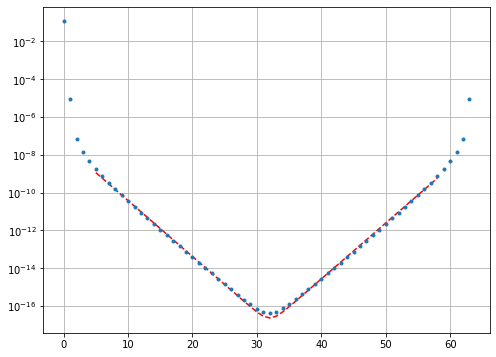

In [241]:
plt.figure(figsize=(8, 6))
plt.errorbar([t for t in range(nt)], np.real(r6_sh_avg),yerr=Rerr_r6_sh , fmt='.')
plt.plot(tdat, su3Cosh0state(np.array(tdat),np.mean(B),np.mean(mpi),np.mean(mD),np.mean(delta) ), 'r--')
plt.yscale('log')
plt.grid();

In [300]:
MPI = 0.1662798053882868
MD = 0.5119061491884139
def su3Cosh1statefixed(t, A, B,delta):
    return A*np.exp(-(MPI+MD)*nt/2)*np.cosh((MD-MPI)*(t-nt/2)) + B*np.cosh((MD+MPI+delta)*(t-nt/2))

In [336]:
tmin = 24
tdat = [t for t in range(tmin,nt-tmin)]

NBS = 200
CFGS = len(r6_sh) # number of configurations
samples = np.random.randint(0, CFGS, [NBS, CFGS])

mD = []
mpi = []
delta = []
A = []
B = []

for bs in range(len(samples)):
    corr = np.array([np.real(r6_sh[cfg]) for cfg in samples[bs]])
    try:
        popt, pcov = curve_fit(su3Cosh1statefixed, tdat, np.mean(corr,axis=0)[tmin:nt-tmin],
                               sigma=np.std(corr,axis=0)[tmin:nt-tmin], 
                               p0 = [1e-7, 1e-17,-.05])
        A.append(popt[0])
        B.append(popt[1])
        delta.append(popt[2])
    except:
        print('# Attempted fit failed')
print(r'A = {} +/- {}'.format(np.mean(A),np.std(A)))
print(r'B = {} +/- {}'.format(np.mean(B),np.std(B)))
print(r'BE = {} +/- {}'.format(np.mean(delta),np.std(delta)))

A = 4.7976946405028844e-08 +/- 8.997938530757354e-10
B = 2.470550875014241e-17 +/- 3.754212333990987e-19
BE = -0.010878281583031134 +/- 0.0012687453928425672


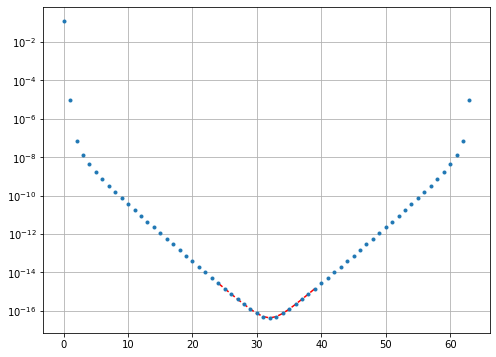

In [337]:
plt.figure(figsize=(8, 6))
plt.errorbar([t for t in range(nt)], np.real(r6_sh_avg),yerr=Rerr_r6_sh , fmt='.')
plt.plot(tdat, su3Cosh1statefixed(np.array(tdat),np.mean(A),np.mean(B),np.mean(delta) ), 'r--')
plt.yscale('log')
plt.grid();

In [349]:
tmin = 20
tdat = [t for t in range(tmin,nt-tmin)]

NBS = 400
CFGS = len(r6_sh) # number of configurations
samples = np.random.randint(0, CFGS, [NBS, CFGS])

mD = []
mpi = []
delta = []
A = []
B = []

for bs in range(len(samples)):
    corr = np.array([np.real(r6_sh[cfg]) for cfg in samples[bs]])
    try:
        popt, pcov = curve_fit(su3Cosh1state, tdat, np.mean(corr,axis=0)[tmin:nt-tmin],
                               sigma=np.std(corr,axis=0)[tmin:nt-tmin],
                               p0 = [1e-7, 1.4e-17,.166,.511,-.05])
        A.append(popt[0])
        B.append(popt[1])
        mpi.append(popt[2])
        mD.append(popt[3])
        delta.append(popt[4])
    except:
        print('# Attempted fit failed')
print(r'm_pi = {} +/- {}'.format(np.mean(mpi),np.std(mpi)))
print(r'm_D = {} +/- {}'.format(np.mean(mD),np.std(mD)))
print(r'A = {} +/- {}'.format(np.mean(A),np.std(A)))
print(r'B = {} +/- {}'.format(np.mean(B),np.std(B)))
print(r'BE = {} +/- {}'.format(np.mean(delta),np.std(delta)))

<ipython-input-268-606b5bdd9d73>:5: RuntimeWarning: overflow encountered in exp
  return A*np.exp(-(mpi+mD)*nt/2)*np.cosh((mD-mpi)*(t-nt/2)) + B*np.cosh((mpi+mD+delta)*(t-nt/2))


m_pi = 0.17130566184441903 +/- 0.008144103845901555
m_D = 0.5234279725248343 +/- 0.009267171383676363
A = 9.270291366079123e-08 +/- 3.7569485813923544e-08
B = 2.4102736665601307e-17 +/- 5.390428602163524e-19
BE = -0.024477172681293388 +/- 0.013834025694367697


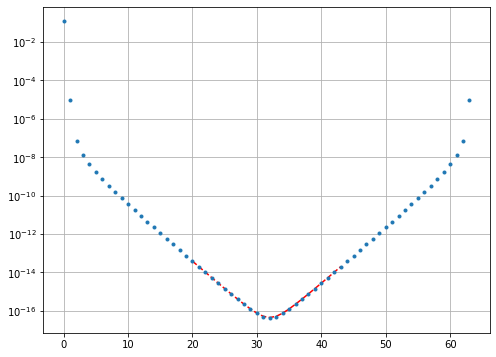

In [350]:
plt.figure(figsize=(8, 6))
plt.errorbar([t for t in range(nt)], np.real(r6_sh_avg),yerr=Rerr_r6_sh , fmt='.')
plt.plot(tdat, su3Cosh1state(np.array(tdat),np.mean(A),np.mean(B),np.mean(mpi),np.mean(mD),np.mean(delta) ), 'r--')
plt.yscale('log')
plt.grid();

In [373]:
tmin = 6
tdat = [t for t in range(tmin,nt-tmin)]

NBS = 400
CFGS = len(r6_sh) # number of configurations
samples = np.random.randint(0, CFGS, [NBS, CFGS])

mD = []
mpi = []
delta = []
A = []
B = []
C = []
e1 = []

for bs in range(len(samples)):
    corr = np.array([np.real(r6_sh[cfg]) for cfg in samples[bs]])
    try:
        popt, pcov = curve_fit(su3Cosh2state, tdat, np.mean(corr,axis=0)[tmin:nt-tmin],
                               sigma=np.std(corr,axis=0)[tmin:nt-tmin],
                               p0 = [2e-7, 2.e-17,1e-23,.166,.511,-.1,1.2])
        A.append(popt[0])
        B.append(popt[1])
        C.append(popt[2])
        mpi.append(popt[3])
        mD.append(popt[4])
        delta.append(popt[5])
        e1.append(popt[6])
    except:
        print('# Attempted fit failed')
print(r'm_pi = {} +/- {}'.format(np.mean(mpi),np.std(mpi)))
print(r'm_D = {} +/- {}'.format(np.mean(mD),np.std(mD)))
print(r'e1 = {} +/- {}'.format(np.mean(e1),np.std(e1)))
print(r'A = {} +/- {}'.format(np.mean(A),np.std(A)))
print(r'B = {} +/- {}'.format(np.mean(B),np.std(B)))
print(r'C = {} +/- {}'.format(np.mean(C),np.std(C)))
print(r'BE = {} +/- {}'.format(np.mean(delta),np.std(delta)))

<ipython-input-268-606b5bdd9d73>:8: RuntimeWarning: overflow encountered in exp
  return A*np.exp(-(mpi+mD)*nt/2)*np.cosh((mD-mpi)*(t-nt/2)) + B*np.cosh((mpi+mD+delta)*(t-nt/2)) + C*np.cosh(e1*(t-nt/2))


m_pi = 0.15962852685814677 +/- 0.005482569705039576
m_D = 0.5503087152050319 +/- 0.005421169846666522
e1 = 1.095755575025879 +/- 0.00734457406270186
A = 1.573117917324804e-07 +/- 6.209530225827445e-08
B = 2.238145995469741e-17 +/- 3.445772572998621e-19
C = 2.1424259854015654e-22 +/- 4.274222798897404e-23
BE = -0.03453997781996907 +/- 0.009643611938752236


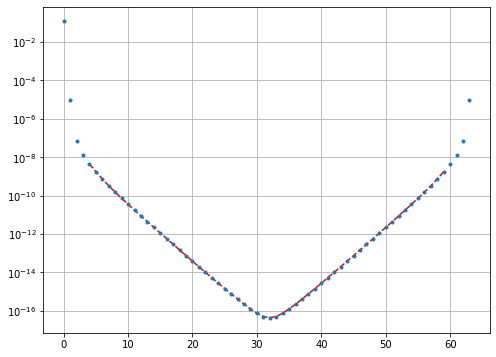

In [370]:
plt.figure(figsize=(8, 6))
plt.errorbar([t for t in range(nt)], np.real(r6_sh_avg),yerr=Rerr_r6_sh , fmt='.')
plt.plot(tdat, su3Cosh2state(np.array(tdat),np.mean(A),np.mean(B),
                             np.mean(C),np.mean(mpi),np.mean(mD),np.mean(delta),np.mean(e1)), 'r--')
plt.yscale('log')
plt.grid();